# <center> Econ 390: Computational Economics </center>
## <center> Dr. Yaroslav Rosokha</center>

# Lecture 8: Introduction to Agent-based Modeling

### Contents
- [What is an Agent-based Model](#abm)
 - [How does AMB approach differ from traditional economic modeling?](#difference)
 - [ABM in Economics](#abm-economics)
 - [Emergent Properties](#emergence)
 - [Goals of ABM](#abm-goals)
 - [ABM Applications](#abm-applications)
- [The Model of Segregation](#the-model-of-segregation)
    - [Thomas Schelling](#schelling)
    - [Algorithm](#algorithm)
- [Using 'Zero-Intelligence' Agents to Test Institutional Design](#za)
- [Reinforcement Learning](#RL)
    
### Readings
- [Schelling's Segregation Model](https://python.quantecon.org/schelling.html#Schelling%E2%80%99s-Segregation-Model)
- [The Double Auction](https://www.investopedia.com/terms/a/auctionmarket.asp)
- [Gode & Sunder (1993)](https://www.jstor.org/stable/2138676?seq=1)
- [Roth & Erev (1998)](https://www.jstor.org/stable/117009?seq=1#metadata_info_tab_contents) p.848-849

### Additional Resources
- [Segregation Model Visualized](https://ncase.me/polygons/)

In [2]:
#Libraries that we have covered before that are used in this notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id="abm"></a>
## What is an Agent-based Model?

The decision-maker is called the **agent**
 - Attributes (e.g., wealth, age, memory)
 - Behaviors (e.g., actions available)
 - Objective (e.g., utility/payoff maximization, satisficing)
 
Everything outside the agent is called the **environment**
 - A set of agent relationships (e.g., network, neighborhood)
 - Rules of nature (e.g., environment may give rise to stochastic rewards)
 - Structure of interactions with other agents and the environment (e.g., dynamics of interactions)
 
> An **agent-based model** is composed of the set of agents, their relationships and the environment

<a id="abm-economics"></a>
## Agent-based Models and Economics

> **Agent-based Computational Economics** -- study of economic processes modeled as dynamic systems of interacting agents who do not necessarily possess perfect rationality and information
- *Heterogeneous Agent Models* is another term that is associated with ABM (typically in the context of macro-economics and finance)
- *Complexity Economics* -- the study of economic systems as complex systems

> A system is **complex** if
- it is composed of interacting units
- it exhibits ***emergent properties*** -- well-formulated aggregate behavior not intended by any unit in the system that arises from localized 

> A complex system that includes goal-directed unit (i.e., units that are reactive, learning) is a **complex adaptive system**


<a id="emergence"></a>
### Biology Example: Termite Cathedral

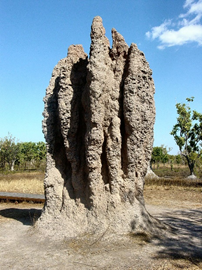

### Economics Example: "The Invisible Hand" 

*"He intends only his own gain, and he is in this, as in many other cases, led by an invisible hand to promote an end which was no part of his intention."* 
    - Adam Smith, The Wealth of Nations

<a id="difference"></a>
## How does AMB differ from traditional Economic Modeling?

Typical assumptions with traditional approach
 1. Agents are rational (i.e., well-defined objectives, optimizing behavior)
 2. Agents are homogeneous
 3. Number of agents in the model is typically 1,2 or $\infty$
 4. Focus on equilibrium analysis (e.g., Nash equilibrium, long-run, steady-state)
 5. Static
 
ABM approach allows us to relax these assumptions
 1. Agents are behavioral or boundedly rational
 2. Agents are heterogeneous
 3. Number of agents in the model 1,2,...,N
 4. Off-equilibrium analysis (e.g., transient states and how equilibrium may be discovered)
 5. Model the dynamics

<a id="abm-goals"></a>
## Goals of ABM

- Understand how aggregate regularities evolve (and persist) without central planning and control
- Understand dynamic behaviors under alternatively specified initial conditions (e.g., off-equilibrium behaviors)
- Discovery and evaluation of good institutional designs
- Controlled Experiments
 - Small models to provide an insight
 - Large-scale models with many details (need to be validated, results are important for policies and decision-making)
 

<a id="amb-appications"></a>
## Applications of ABM
- Economics
- Banking and Finance
- Anthropology
- Biology
- Ecology
- Sociology
- Supply Chains
- Consumer markets
- Military Planning

Why is AMB approach becoming so popular?
- Advances in computation
- Availability of micro-data

<a id="the-model-of-segregation"></a>
# The Model of Segregation 

<a id="schelling"></a>
### Thomas Schelling (1921-2016)
- **Nobel Prize in 2005** for contributions to Game Theory (understanding of conflict and cooperation)
- Among the very first agent-based modelers 

### Schelling (1969)
Can relatively mild preferences for neighbors of similar race lead in aggregate to the collapse of mixed neighborhoods, and high levels of segregation? 

To answer this question Schelling designed a computational experiment:
- Start with two populations of agents placed at random on a chess-board (grid)
- An agent is satisfied with it's location if the proportion p of its neighbors is like itself
- If an agent is not satisfied it will move to another random open location

<a id="algorithm"></a>
#### Algorithm
1. Initialize the environment by randomly placing agents on the grid
2. Cycle through the set of agents
 - The agent moves to a random open spot if it is not satisfied
3. Repeat step 2 until no one wishes to move (or max iterations is reached)


### On-line visualization by Vi Hart & Nicky Case
- [Segregation Model Visualized](https://ncase.me/polygons/)

## One-dimensional Model of Segregation 

In [23]:
class Agent:
    ''' Class definition of the Agent in Schelling 1D model'''
    
    def __init__(self,location,race,neighbors,threshold): #Object constructor
        ''' Initialize agent.
                location -- location of the agent
                race -- race of the agent
                neighborhood -- list of neighbors
                threshold -- similarity threshold
        '''
        self.loc = location
        self.race = race
        self.neighborhood = neighbors
        self.thresh = threshold
        
    def satisfied(self): 
        '''function that returns True of False depending if the threshold is met'''
        if np.mean((self.neighborhood==self.race))>self.thresh:
            print("Stay")
        else:
            print("Move")
        return np.mean((self.neighborhood==self.race))>self.thresh
        
    
    def moveToNewLoc(self,newLoc,newNeighbors): 
        '''function that updates the new neighborhood info'''
        self.loc=newLoc
        self.neighborhood=newNeighbors
        
    def getSegregationMetric(self):
        self.seg = np.mean((self.neighborhood==self.race))
        return self.seg
    
    def __repr__(self):
        return "L"+str(self.loc)+" R:"+str(self.race)+" N:"+str(self.neighborhood)
    def __str__(self):
        return "L"+str(self.loc)+" R:"+str(self.race)+" N:"+str(self.neighborhood)

In [24]:
# Consider the case when there two types of agents: 1 and 2 (with 0 denoting an empty location)
a1 = Agent(0,1,np.array([1,1,1,1]),1/3)
a2 = Agent(1,1,np.array([1,1,2,0]),1/3)

In [25]:
a1.getSegregationMetric()

1.0

In [39]:
class Environment:
    ''' Class definition of the Environment of Schelling 1D model'''
    
    def __init__(self, races, props, width=100, threshold=1/3, max_iter=1000):
        ''' Initialize environment.
                races -- array of races (e.g., [0,1,2]) with 0 denoting an empty space
                props -- proportion of races
                width -- width of the line
                threshold -- similarity threshold
                max_iter -- maximum number of iterations
        '''
        
        self.width = width
        self.races = races  
        self.props = props        
        self.threshold = threshold
        self.max_iter = max_iter
        
        self.agents = []
        self.line = []
        self.available_locs=[]
        self.all_satisfied=False
        
    
    def resetLine(self):
        '''Function to reset line'''
        self.line=np.zeros(self.width) #initialize the line to be empty (all zeros)
        self.available_locs=range(self.width) #initialize available spots to be all
        for i in self.races[1:]: #For each race i starting with 1 (since 0 denotes an empty spot)
            #generate random locations for proportion self.prop[i] of the spots
            locs=np.random.choice(self.available_locs,size=int(self.props[i]*self.width),replace=False)
            self.line[locs]=i 
            self.available_locs=np.setdiff1d(self.available_locs,locs) #remote spots occupied by race i from available
           
        self.agents = [] #create a list of agents corresponding to the line above
        for i,r in enumerate(self.line):
            if r>0:
                leftHood=self.line[range(max(0,i-4),max(0,i))]
                rightHood=self.line[range(min(i+1,self.width),min(i+5,self.width))]
                hood=np.concatenate([leftHood,rightHood],axis=0)
                self.agents.append(Agent(i,r,hood,self.threshold))
                
    
    def oneMoveEach(self): #Go through each agent and see it is satisfied. If not move it to one of the available spots
        self.all_satisfied = True #set it to true, if encounter anyone that is not satisfied then set it to false
        for a in self.agents:
            print(a)
            if not a.satisfied():
                self.all_satisfied = False
                oldLoc=a.loc
                newLoc=np.random.choice(self.available_locs,size=1)[0]
                
                self.line[oldLoc]=0
                self.line[newLoc]=a.race
                
                self.available_locs=np.setdiff1d(self.available_locs,newLoc)
                
                #-------------------- This is where the neighborhood is created ----------------------
                newLeftHood=self.line[range(max(0,newLoc-4),max(0,newLoc))]
                newRightHood=self.line[range(min(newLoc+1,self.width),min(newLoc+5,self.width))]
                newHood=np.concatenate([newLeftHood,newRightHood],axis=0)            
                
                a.moveToNewLoc(newLoc,newHood)
                self.available_locs=np.append(self.available_locs,np.array([oldLoc]),axis=0)
            
    
    def runUntilConverged(self):
        step=0
        while not self.all_satisfied and step<=self.max_iter:
            print(step)
            self.oneMoveEach()
            step = step + 1
            
    def getPopulationMetric(self):
        self.popMetric=np.array([a.getSegregationMetric() for a in self.agents])
        return self.popMetric.mean()
            
    def __repr__(self):
        return str(self.line)            
    def __str__(self):
        return str(self.line)

In [40]:
#Test
e1 = Environment([0,1,2], [.25,.25,.5], width=9)
e1.resetLine()
e1

[2. 2. 2. 0. 0. 2. 0. 1. 1.]

In [41]:
e1.oneMoveEach()

L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L5 R:2.0 N:[2. 2. 0. 0. 0. 1. 1.]
Move
L7 R:1.0 N:[0. 0. 2. 0. 1.]
Move
L8 R:1.0 N:[0. 2. 0. 1.]
Move


In [42]:
e1

[2. 2. 2. 2. 0. 1. 0. 1. 0.]

In [43]:
e1.oneMoveEach()

L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 0. 1.]
Move
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move


In [44]:
e1.runUntilConverged()

0
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
1
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
2
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 0. 1. 0.]
Move
3
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 0. 1.]
Move
L6 R:1.0 N:[2. 2. 0. 1. 0. 0.]
Move
4
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1

L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
54
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 0. 1.]
Move
55
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
56
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
57
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
58
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R

93
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
94
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
95
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 0. 1.]
Move
96
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
97
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2

L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
136
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
137
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 0. 1.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
138
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
139
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
140
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0

Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
179
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
180
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
181
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
L8 R:1.0 N:[0. 0. 0. 1.]
Move
182
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0

L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 1. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
218
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
219
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 0. 0. 1.]
Move
220
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
221
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
L8 R:1

275
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
276
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
277
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
278
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
L8 R:1.0 N:[1. 0. 0. 0.]
Move
279
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay

L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
314
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
315
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
316
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
317
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
318
L0 R:2.0 N:[2.

Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
365
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
366
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[1. 0. 0. 0.]
Move
367
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
368
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
369
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 

411
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
412
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
413
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
414
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
415
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7

L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 0. 1.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
455
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
456
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
457
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
458
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
459
L0 R:2.0 N:[2. 2. 0. 0.]
S

L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
504
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
505
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
506
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
507
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 0. 1.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
508
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:

Move
546
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
547
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
548
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
L8 R:1.0 N:[0. 0. 1. 0.]
Move
549
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
550
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 

L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
591
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
L8 R:1.0 N:[0. 0. 0. 1.]
Move
592
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
593
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
594
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
595
L0 R:2.0 N:[2. 2. 0. 0.]
S

Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
632
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
633
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
634
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
635
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
L4 R:1.0 N:[2. 2. 2

L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 0. 1.]
Move
671
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
672
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
673
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[1. 0. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
674
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 

713
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
714
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
715
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
716
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
717
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0.

L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
763
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
764
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
765
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[1. 0. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
766
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
767
L0

L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
810
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 1. 0. 0.]
Move
811
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 1. 0. 0. 0.]
Move
812
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
813
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
814
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.

L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
859
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 1. 0. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
860
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
L8 R:1.0 N:[1. 0. 0. 0.]
Move
861
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move
862
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 1. 0.]
Move
L8 R:1.0 N:[1. 0. 0. 0.]
Move
863
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:

L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
L8 R:1.0 N:[0. 1. 0. 0.]
Move
913
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
914
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 1. 0. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
915
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 1. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 1. 0.]
Move
916
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 0. 1. 0.]
Move
L5 R:1.0 N:[2. 2. 2. 0. 0. 0. 1.]
Move


L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L4 R:1.0 N:[2. 2. 2. 2. 0. 0. 0. 1.]
Move
L5 R:1.0 N:[2. 2. 2. 1. 0. 0. 0.]
Move
957
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[0. 1. 0. 0.]
Move
L7 R:1.0 N:[2. 0. 0. 0. 1.]
Move
958
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L5 R:1.0 N:[2. 2. 2. 0. 0. 1. 0.]
Move
L4 R:1.0 N:[2. 2. 2. 2. 1. 0. 0. 0.]
Move
959
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L8 R:1.0 N:[1. 0. 0. 0.]
Move
L6 R:1.0 N:[2. 2. 0. 0. 0. 1.]
Move
960
L0 R:2.0 N:[2. 2. 0. 0.]
Stay
L1 R:2.0 N:[2. 2. 0. 0. 2.]
Stay
L2 R:2.0 N:[2. 2. 0. 0. 2. 0.]
Stay
L3 R:2.0 N:[2. 2. 2. 0. 0. 0. 1.]
Stay
L7 R:1.0 N:[2. 0. 0. 1. 0.]
Move


In [45]:
e1

[2. 2. 2. 2. 0. 1. 1. 0. 0.]

In [46]:
e1.getPopulationMetric()

0.38968253968253963

<a id="za"></a>

# Testing Institutional Design through ABM Simulations

> The **Double Auction** is an auction mechanism in which buyers and sellers enter limit orders (bids or asks) and accept asks or bids entered by others. When a match between a buyer's bid and a seller's ask is found, the trade proceeds at that price. Trades without matches will not be executed.

Major stock, commodity, and currency markets are organized similar to double auctions.

### Gode and Sunder (1993) 

Conduct a test of allocative efficiency of the double auction using "Zero-intelligence" traders and compare it to Smith (1962, 1976) human subject experiments. (Aside: these were some of the very first experiments conducted in the field of economics. Vernon Smith, who won the Nobel Prize in 2002, was working at Purdue University at that time.)

From Gode and Sunder (1993): "*In a double auction any buyer can enter a bid by stating his or her
identity, unit price, and quantity. The same buyer or other buyers
can subsequently raise the bid. Similarly, any seller can enter an ask by
stating quantity and price. If bids and asks match or cross, a binding
transaction occurs. Any buyer is free to accept the outstanding ask
and any seller is free to accept the outstanding bid at any time to
conclude a transaction.*

*There are several variations of the double auction. We made three
choices to simplify our implementation of the double auction. Each
bid, ask, and transaction was valid for a single unit. A transaction
canceled any unaccepted bids and offers. Finally, when a bid and ask
crossed, the transaction price was equal to the earlier of the two.*"

In [47]:
class Buyer():
    
    def __init__(self,demand,LB=1,UB=200,ID=None):    #Constructor. demand is a list of buyer values sorted from high to low
        self.ID=ID
        self.demand=np.array(demand)
        self.units=0
        self.profit=0
        self.upperBound=UB
        self.lowerBound=LB
        
    def generateBid(self):
        if len(self.demand)>0:
            return np.random.choice(np.arange(self.lowerBound,self.upperBound+1))
        else:
            return None
        
    def bought(self,price):
        self.units+=1
        self.profit+=self.demand[0]-price
        self.demand=self.demand[1:]
        
        
    def __str__(self):
        return "B"+str(self.ID)+str(self.demand)
    def __repr__(self):
        return "B"+str(self.ID)+str(self.demand)

In [50]:
#Test Buyer

b1 = Buyer([100,95,90,85,80,75],ID=1)
b1

B1[100  95  90  85  80  75]

In [71]:
b1.generateBid()

13

In [72]:
class Seller():
    
    def __init__(self,supply,LB=1,UB=200,ID=None): #Constructor. supply is a list of seller costs sorted from low to high
        self.ID=ID
        self.supply=np.array(supply)
        self.units=len(supply)
        self.profit=0
        self.upperBound=UB
        self.lowerBound=LB
  
    def generateAsk(self):
        if len(self.supply)>0:
            return np.random.choice(np.arange(self.lowerBound,self.upperBound+1))
        else:
            return None

    def sold(self,price):
        self.units-=1
        self.profit+=price-self.supply[0]
        self.supply=self.supply[1:]
        
    def __str__(self):
        return "S"+str(self.ID)+str(self.supply)
    def __repr__(self):
        return "S"+str(self.ID)+str(self.supply)

In [75]:
#Test Seller

s1 = Seller ([50,60,70,80,90,100],ID=1)
s1


S1[ 50  60  70  80  90 100]

In [76]:
s1.generateAsk()

81

In [77]:
s1.sold(75)

In [78]:
s1.supply

array([ 60,  70,  80,  90, 100])

In [79]:
s1.profit

25

In [80]:
b1.bought(75)

In [81]:
b1.demand

array([95, 90, 85, 80, 75])

In [82]:
b1.units

1

In [83]:
b1.profit

25

In [84]:
class Auction():
    
    def __init__(self,demandBuyers,supplySellers,LB=1,UB=200):
        
        self.buyers=[Buyer(x,LB,UB) for x in demandBuyers] #Create a list of buyers
        self.sellers=[Seller(x,LB,UB) for x in supplySellers] #Create a list of sellers
        
        self.nBuyers=len(demandBuyers)
        self.nSellers=len(supplySellers)
        
        self.upperBound=UB
        self.lowerBound=LB
        
    def simulateOneTransaction(self):
        
        bestBid=self.lowerBound
        bestAsk=self.upperBound
        
        bestBuyer=None
        bestSeller=None
        
        #Outline of Steps
        #Repeat until number of max iterations is reach or the transcation is made
        #Randomly choose a buyer or seller and draw a bid/ask
        # if buyer is drawn, draw a bid
        #    if bid is > best current ask => execute tranactions (i.e., we are done)
        #    otherwise compare with best outstand bid and record if larger or discard if smaller
        # if seller is drawn, draw an ask
        #    if ask is < best current bid => execute transaction (i.e., we are done)
        #    otherwise compare with best outstand ask and record if smaller or discard if larger 
        
    
    def simulateManyTransactions(self):
    
    
    def plotMarket(self):
        
        self.bValues=np.concatenate([b.demand for b in self.buyers])
        self.sValues=np.concatenate([s.supply for s in self.sellers])
            
        prices=range(self.lowerBound,self.upperBound+1)
        demandCurve=[np.sum(self.bValues>p) for p in prices]
        supplyCurve=[np.sum(self.sValues<p) for p in prices]
        
        plt.plot(demandCurve,prices,'b',label='Buyer')
        plt.plot(supplyCurve,prices,'r',label='Seller')
        plt.xlabel('Quantity')
        plt.ylabel('Price')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

In [85]:
# Set up for Market 1
buyerVals=[[100,95,90,85,80,75] for x in range(6)] #Generate 6 buyers (with 6 buyer values)
sellerVals=[[40,50,60,70,80,90] for x in range(6)] #Generate 6 sellers (with 6 seller values)
a1=Auction(buyerVals,sellerVals) #Create an auction

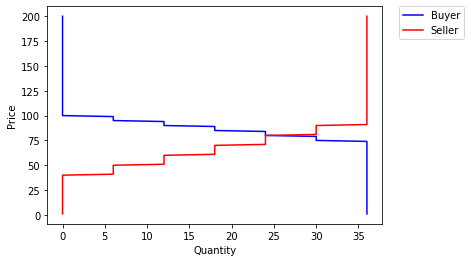

In [86]:
a1.plotMarket() #Plot supply and demand for Market 1

<a id="RL"></a>
# Reinforcement Learning

Why understanding the learning process is important?
- Individual Choice
- Strategic Interactions
- Markets

Three main paradigms
- Reinforcement Learning
- Belief Learning
- Evolutionary Learning

## Introduction: Reinforcement Learning
-Psychology
> **"Law of Effect"** (Thorndike 1898): actions or strategies that have yielded relatively higher payoffs in the past are more likely to e played in the future
- Bush and Mosteller (1955): one of the first RL models;
- Siegel (1961): incentivized individual choice experiments with RL predictions

- Economics (in combination with human subject experiments)
    - Arthur (1991, 1993) - RL algorithms and individual choice experiments (multi-arm bandits)
    - Roth and Erev (1995) and Erev and Roth (1998) - RL in multi-player games
        - Aside: **Al Roth won Nobel Prize in Economics in 2012** for the theory of stable allocations and the practice of market design
    
- Computer Science
    - Reinforcement learning is related to Bellman's approach to dynamic programming (e.g., Q-learning (Watkins 1989))
    - Convergence results proven under certain assumptions for Markov-decision processes
    

# Learning Over Actions

Suppose we consider the following 2-player game:

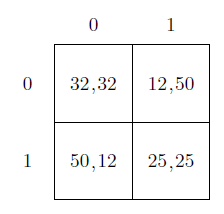

Strategy set: $S_i=\{0,1\} \forall i \in \{1,2\}$

### Three key components

- Initialize Values <font color='gray'>*(attractions, propensities, strengths)*</font>
 - $V_0(s)=V_0 \forall s\in S$ <font color='gray'>*(e.g., average between min and max stage game payoffs)*</font>
 
 
- Policy <font color='gray'>*(choice rule)*</font>
 - $p_0(s)=e^{\lambda V_0(s)}/\sum_{r\in S}e^{\lambda V(r)} \; \forall s\in S$ <font color='gray'>*(Boltzman, softmax, logit)*</font>, where **$\lambda$** determines experimentation
 
 
- Reinforcement <font color='gray'>*(updating)*</font>
 - Suppose in supergame $t$, player $i$ plays $s$ and receives a payoff of $x$
 - $V_{t+1}(s)=(1-\alpha)V_{t}(s)+\alpha x$  where **$\alpha$** determines forgetting

In [3]:
#Initialize the game matrix (notice that it is symmetric, so I can just keep track of payoffs from one player's perspective)
G = np.array([[32,12],[50,25]])

#Initialize the strategy set
strategies = np.arange(2)

#Initialize RL parameters
lam = .1
alpha = .1

In [4]:
#Initialize Values
values1 = np.ones(2)*(G.min()+G.max())/2
values2 = np.ones(2)*(G.min()+G.max())/2

In [5]:
values1,values2

(array([31., 31.]), array([31., 31.]))

In [6]:
np.round(np.exp(lam*values1)/np.exp(lam*values1).sum(),3)

array([0.5, 0.5])

In [7]:
policy1 = np.exp(lam*values1)/np.exp(lam*values1).sum()
action1 = np.random.choice(strategies,p=policy1) 
action1

1

In [8]:
policy2 = np.exp(lam*values2)/np.exp(lam*values2).sum()
action2 = np.random.choice(strategies,p=policy2)
action2

0

In [9]:
r1 = G[action1,action2]
r2 = G[action2,action1]

r1,r2

(50, 12)

In [10]:
T = 500
results = np.zeros(T)


for t in range(500):
    print("="*50)
    print(t)
    
    policy1 = np.exp(lam*values1)/np.exp(lam*values1).sum()
    action1 = np.random.choice(strategies,p=policy1) 
    
    policy2 = np.exp(lam*values2)/np.exp(lam*values2).sum()
    action2 = np.random.choice(strategies,p=policy2)
    
    r1 = G[action1,action2]
    r2 = G[action2,action1]
    
    values1[action1] = (1-alpha)*values1[action1] + alpha*r1
    values2[action2] = (1-alpha)*values2[action2] + alpha*r2
    
    print(action1,"->",r1,"->",values1)
    print(action2,"->",r2,"->",values2)
    
    results[t]=(policy1[0]+policy2[0])/2

0
1 -> 25 -> [31.  30.4]
1 -> 25 -> [31.  30.4]
1
1 -> 25 -> [31.   29.86]
1 -> 25 -> [31.   29.86]
2
0 -> 32 -> [31.1  29.86]
0 -> 32 -> [31.1  29.86]
3
1 -> 50 -> [31.1   31.874]
0 -> 12 -> [29.19 29.86]
4
1 -> 25 -> [31.1    31.1866]
1 -> 25 -> [29.19  29.374]
5
1 -> 25 -> [31.1     30.56794]
1 -> 25 -> [29.19   28.9366]
6
0 -> 32 -> [31.19    30.56794]
0 -> 32 -> [29.471  28.9366]
7
0 -> 12 -> [29.271   30.56794]
1 -> 50 -> [29.471   31.04294]
8
1 -> 50 -> [29.271    32.511146]
0 -> 12 -> [27.7239  31.04294]
9
1 -> 25 -> [29.271     31.7600314]
1 -> 25 -> [27.7239   30.438646]
10
1 -> 50 -> [29.271      33.58402826]
0 -> 12 -> [26.15151  30.438646]
11
1 -> 25 -> [29.271      32.72562543]
1 -> 25 -> [26.15151   29.8947814]
12
0 -> 12 -> [27.5439     32.72562543]
1 -> 50 -> [26.15151    31.90530326]
13
1 -> 25 -> [27.5439     31.95306289]
1 -> 25 -> [26.15151    31.21477293]
14
0 -> 12 -> [25.98951    31.95306289]
1 -> 50 -> [26.15151    33.09329564]
15
1 -> 25 -> [25.98951   31.2577

69
0 -> 32 -> [22.12581334 29.57223287]
0 -> 32 -> [23.81869752 33.57966906]
70
1 -> 25 -> [22.12581334 29.11500958]
1 -> 25 -> [23.81869752 32.72170215]
71
1 -> 25 -> [22.12581334 28.70350863]
1 -> 25 -> [23.81869752 31.94953194]
72
1 -> 25 -> [22.12581334 28.33315776]
1 -> 25 -> [23.81869752 31.25457874]
73
1 -> 25 -> [22.12581334 27.99984199]
1 -> 25 -> [23.81869752 30.62912087]
74
0 -> 32 -> [23.11323201 27.99984199]
0 -> 32 -> [24.63682777 30.62912087]
75
1 -> 25 -> [23.11323201 27.69985779]
1 -> 25 -> [24.63682777 30.06620878]
76
1 -> 25 -> [23.11323201 27.42987201]
1 -> 25 -> [24.63682777 29.5595879 ]
77
1 -> 50 -> [23.11323201 29.68688481]
0 -> 12 -> [23.37314499 29.5595879 ]
78
1 -> 25 -> [23.11323201 29.21819633]
1 -> 25 -> [23.37314499 29.10362911]
79
1 -> 25 -> [23.11323201 28.7963767 ]
1 -> 25 -> [23.37314499 28.6932662 ]
80
1 -> 25 -> [23.11323201 28.41673903]
1 -> 25 -> [23.37314499 28.32393958]
81
1 -> 25 -> [23.11323201 28.07506512]
1 -> 25 -> [23.37314499 27.99154562]

1 -> 25 -> [18.55162827 26.14125741]
1 -> 25 -> [19.81309207 27.78062693]
152
1 -> 25 -> [18.55162827 26.02713167]
1 -> 25 -> [19.81309207 27.50256424]
153
1 -> 25 -> [18.55162827 25.9244185 ]
1 -> 25 -> [19.81309207 27.25230782]
154
0 -> 12 -> [17.89646544 25.9244185 ]
1 -> 50 -> [19.81309207 29.52707704]
155
1 -> 25 -> [17.89646544 25.83197665]
1 -> 25 -> [19.81309207 29.07436933]
156
1 -> 25 -> [17.89646544 25.74877899]
1 -> 25 -> [19.81309207 28.6669324 ]
157
0 -> 12 -> [17.3068189  25.74877899]
1 -> 50 -> [19.81309207 30.80023916]
158
1 -> 25 -> [17.3068189  25.67390109]
1 -> 25 -> [19.81309207 30.22021524]
159
1 -> 50 -> [17.3068189  28.10651098]
0 -> 12 -> [19.03178286 30.22021524]
160
1 -> 25 -> [17.3068189  27.79585988]
1 -> 25 -> [19.03178286 29.69819372]
161
1 -> 25 -> [17.3068189  27.51627389]
1 -> 25 -> [19.03178286 29.22837435]
162
1 -> 50 -> [17.3068189 29.7646465]
0 -> 12 -> [18.32860457 29.22837435]
163
0 -> 32 -> [18.77613701 29.7646465 ]
0 -> 32 -> [19.69574412 29.22

0 -> 32 -> [21.0230271  29.11558713]
0 -> 32 -> [20.33204738 27.11117106]
244
1 -> 50 -> [21.0230271  31.20402841]
0 -> 12 -> [19.49884264 27.11117106]
245
1 -> 25 -> [21.0230271  30.58362557]
1 -> 25 -> [19.49884264 26.90005396]
246
0 -> 12 -> [20.12072439 30.58362557]
1 -> 50 -> [19.49884264 29.21004856]
247
1 -> 25 -> [20.12072439 30.02526301]
1 -> 25 -> [19.49884264 28.78904371]
248
1 -> 25 -> [20.12072439 29.52273671]
1 -> 25 -> [19.49884264 28.41013934]
249
0 -> 12 -> [19.30865195 29.52273671]
1 -> 50 -> [19.49884264 30.5691254 ]
250
0 -> 12 -> [18.57778675 29.52273671]
1 -> 50 -> [19.49884264 32.51221286]
251
1 -> 25 -> [18.57778675 29.07046304]
1 -> 25 -> [19.49884264 31.76099158]
252
0 -> 12 -> [17.92000808 29.07046304]
1 -> 50 -> [19.49884264 33.58489242]
253
0 -> 12 -> [17.32800727 29.07046304]
1 -> 50 -> [19.49884264 35.22640318]
254
1 -> 50 -> [17.32800727 31.16341674]
0 -> 12 -> [18.74895838 35.22640318]
255
1 -> 25 -> [17.32800727 30.54707506]
1 -> 25 -> [18.74895838 34.

1 -> 25 -> [14.89273563 31.80401401]
316
1 -> 25 -> [14.05166484 29.17420519]
1 -> 25 -> [14.89273563 31.12361261]
317
0 -> 12 -> [13.84649836 29.17420519]
1 -> 50 -> [14.89273563 33.01125134]
318
1 -> 25 -> [13.84649836 28.75678467]
1 -> 25 -> [14.89273563 32.21012621]
319
1 -> 25 -> [13.84649836 28.38110621]
1 -> 25 -> [14.89273563 31.48911359]
320
1 -> 25 -> [13.84649836 28.04299559]
1 -> 25 -> [14.89273563 30.84020223]
321
1 -> 25 -> [13.84649836 27.73869603]
1 -> 25 -> [14.89273563 30.25618201]
322
1 -> 25 -> [13.84649836 27.46482642]
1 -> 25 -> [14.89273563 29.73056381]
323
1 -> 25 -> [13.84649836 27.21834378]
1 -> 25 -> [14.89273563 29.25750743]
324
1 -> 25 -> [13.84649836 26.9965094 ]
1 -> 25 -> [14.89273563 28.83175668]
325
1 -> 25 -> [13.84649836 26.79685846]
1 -> 25 -> [14.89273563 28.44858101]
326
1 -> 25 -> [13.84649836 26.61717262]
1 -> 25 -> [14.89273563 28.10372291]
327
1 -> 50 -> [13.84649836 28.95545536]
0 -> 12 -> [14.60346207 28.10372291]
328
1 -> 25 -> [13.84649836

1 -> 25 -> [19.429311   30.88625527]
398
1 -> 25 -> [16.62429098 26.60820251]
1 -> 25 -> [19.429311   30.29762975]
399
1 -> 25 -> [16.62429098 26.44738226]
1 -> 25 -> [19.429311   29.76786677]
400
1 -> 50 -> [16.62429098 28.80264404]
0 -> 12 -> [18.6863799  29.76786677]
401
1 -> 25 -> [16.62429098 28.42237963]
1 -> 25 -> [18.6863799  29.29108009]
402
1 -> 25 -> [16.62429098 28.08014167]
1 -> 25 -> [18.6863799  28.86197209]
403
1 -> 50 -> [16.62429098 30.2721275 ]
0 -> 12 -> [18.01774191 28.86197209]
404
1 -> 25 -> [16.62429098 29.74491475]
1 -> 25 -> [18.01774191 28.47577488]
405
1 -> 25 -> [16.62429098 29.27042328]
1 -> 25 -> [18.01774191 28.12819739]
406
1 -> 50 -> [16.62429098 31.34338095]
0 -> 12 -> [17.41596772 28.12819739]
407
1 -> 25 -> [16.62429098 30.70904285]
1 -> 25 -> [17.41596772 27.81537765]
408
1 -> 25 -> [16.62429098 30.13813857]
1 -> 25 -> [17.41596772 27.53383988]
409
0 -> 12 -> [16.16186188 30.13813857]
1 -> 50 -> [17.41596772 29.7804559 ]
410
1 -> 25 -> [16.16186188

1 -> 25 -> [18.92320032 30.86820817]
1 -> 25 -> [19.98649792 33.93241796]
483
0 -> 12 -> [18.23088029 30.86820817]
1 -> 50 -> [19.98649792 35.53917617]
484
0 -> 12 -> [17.60779226 30.86820817]
1 -> 50 -> [19.98649792 36.98525855]
485
1 -> 25 -> [17.60779226 30.28138735]
1 -> 25 -> [19.98649792 35.7867327 ]
486
1 -> 25 -> [17.60779226 29.75324862]
1 -> 25 -> [19.98649792 34.70805943]
487
0 -> 12 -> [17.04701303 29.75324862]
1 -> 50 -> [19.98649792 36.23725348]
488
1 -> 25 -> [17.04701303 29.27792376]
1 -> 25 -> [19.98649792 35.11352814]
489
1 -> 25 -> [17.04701303 28.85013138]
1 -> 25 -> [19.98649792 34.10217532]
490
1 -> 50 -> [17.04701303 30.96511824]
0 -> 12 -> [19.18784813 34.10217532]
491
1 -> 25 -> [17.04701303 30.36860642]
1 -> 25 -> [19.18784813 33.19195779]
492
1 -> 50 -> [17.04701303 32.33174578]
0 -> 12 -> [18.46906332 33.19195779]
493
1 -> 25 -> [17.04701303 31.5985712 ]
1 -> 25 -> [18.46906332 32.37276201]
494
1 -> 50 -> [17.04701303 33.43871408]
0 -> 12 -> [17.82215698 32.

Text(0, 0.5, 'Probablity of Playing Strategy 0')

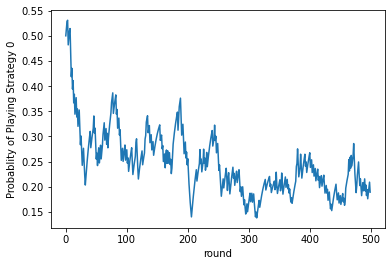

In [11]:
plt.plot(results)
plt.xlabel('round')
plt.ylabel('Probablity of Playing Strategy 0')